<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/linear_regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

|                                                -                                                |                                                -                                                |                                                -                                                |
|-------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
|            [Exercise 10 (linear regression)](<#Exercise-10-(linear-regression&#41;>)            |                 [Exercise 11 (mystery data)](<#Exercise-11-(mystery-data&#41;>)                 | [Exercise 12 (coefficient of determination)](<#Exercise-12-(coefficient-of-determination&#41;>) |
|    [Exercise 13 (cycling weather continues)](<#Exercise-13-(cycling-weather-continues&#41;>)    |                                                                                                 |                                                                                                 |



# Machine learning: linear regression

## Linear regression
Regression analysis tries to explain relationships between variables. One of these variables, called dependend variable, is what we want to "explain" using one or more *explanatory variables*. In linear regression we assume that the dependent variable can be, approximately, expressed as a linear combination of the explanatory variables. As a simple example, we might have dependent variable height and an explanatory variable age. The age of a person can quite well explain the height of a person, and this relationship is approximately linear for kids (ages between 1 and 16). Another way of thinking about regression is fitting a curve to the observed data points. If we have only one explanatory variable, then this is easy to visualize, as we shall see below.

We can apply the linear regression easily with the [scikit-learn](https://scikit-learn.org/stable/) package. Let's go through some examples.

First we make the usual standard imports.

#### <div class="alert alert-info">Exercise 10 (linear regression)</div>

This exercise can give two points at maximum!

Part 1.

Write a function `fit_line` that gets one dimensional arrays `x` and `y` as parameters. The function should return the tuple `(slope, intercept)` of the fitted line. Write a main program that tests the `fit_line` function with some example arrays. The main function should produce output in the following form:

```
Slope: 1.0
Intercept: 1.16666666667
```

Part 2.

Modify your `main` function to plot the fitted line using matplotlib, in addition to the textual output. Plot also the original data points.

<hr/>

Slope:  2.0057351827514363
Intercept:  0.8818990335144985


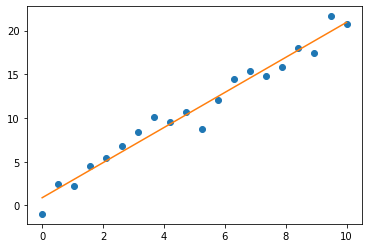

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def fit_line(x, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(x[:,np.newaxis],y)
    return model.coef_[0], model.intercept_
    
def main():
    #create data set
    x = np.linspace(0,10,20)
    y = x*2+1+ 1*np.random.randn(20)

    #training
    Slope, intercept = fit_line(x,y)
    print("Slope: ",Slope)
    print("Intercept: ",intercept)

    #Fitting a reg line
    xfit=np.linspace(0,10,100)
    yfit=xfit*Slope + intercept # regression equation

    plt.plot(x,y, "o")
    plt.plot(xfit,yfit)
    plt.show()

if __name__ == "__main__":
    main()


#### <div class="alert alert-info">Exercise 11 (mystery data)</div>
Read the tab separated file `mystery_data.tsv`. Its first five columns define the features, and the last column is the response. Use scikit-learn's `LinearRegression` to fit this data. Implement function `mystery_data` that reads this file and learns and returns the regression coefficients for the five features. You don't have to fit the intercept. The `main` method should print output in the following form:

```
Coefficient of X1 is ...
Coefficient of X2 is ...
Coefficient of X3 is ...
Coefficient of X4 is ...
Coefficient of X5 is ...
```

Which features you think are needed to explain the response Y?

<hr/>

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def mystery_data():
    df = pd.read_csv('C:\mystery_data.tsv', sep = "\t") 
    model = LinearRegression(fit_intercept=False)
    model.fit(df.iloc[:,0:5], df.iloc[:,5])
    return model.coef_

def main():
    coefficients = mystery_data()
    print(coefficients)

    
if __name__ == "__main__":
    main()


[ 3.0000000e+00 -1.0000000e+00  7.0000000e+00 -1.8101968e-15
 -2.0000000e+01]


#### <div class="alert alert-info">Exercise 12 (coefficient of determination)</div>

This exercise can give two points at maximum!

Using the same data as in the previous exercise, instead of printing the regression coefficients, print the *coefficient of determination*. The coefficient of determination, denoted by R2, tells how well the linear regression fits the data. The maximum value of the coefficient of determination is 1. That means the best possible fit.

Part 1.

Using all the features (X1 to X5), fit the data using a linear regression (include the intercept). Get the coefficient of determination using the `score` method of the `LinearRegression` class. Write a function `coefficient_of_determination` to do all this. It should return a list containing the R2-score as the only value.

Part 2.

Extend your function so that it also returns R2-scores related to linear regression with each single feature in turn. The `coefficient_of_determination` (https://en.wikipedia.org/wiki/Coefficient_of_determination) function should therefore return a list with six R2-scores (the first score is for five features, like in Part 1). To achieve this, your function should call both the `fit` method and the `score` method six times. 

The output from the main method should look like this:
```
R2-score with feature(s) X: ...
R2-score with feature(s) X1: ...
R2-score with feature(s) X2: ...
R2-score with feature(s) X3: ...
R2-score with feature(s) X4: ...
R2-score with feature(s) X5: ...
```
How small can the R2-score be? Experiment both with fitting the intercept and without fitting the intercept.

<hr/>

In [3]:
import pandas as pd
from sklearn import linear_model


def coefficient_of_determination():
    
    df = pd.read_csv('C:\mystery_data.tsv', sep = "\t") 
    model = linear_model.LinearRegression(fit_intercept=True)
    model.fit(df.iloc[:,0:5], df.iloc[:,5])

    score = []
    score.append(model.score(df.iloc[:,0:5], df.iloc[:,5], sample_weight=None))

    for i in df.iloc[:,0:5]:
        model.fit(df.iloc[:,0:5][i].values.reshape(-1,1), df.iloc[:,5] )
        score.append(model.score(df.iloc[:,0:5][i].values.reshape(-1,1), df.iloc[:,5]))
    
    return score

def main():
    coefficient = coefficient_of_determination()
    print(coefficient)


if __name__ == "__main__":
    main()

[1.0, 0.016918272602768458, 0.008964585308688822, 0.08785404530656271, 0.00030237088254569944, 0.8679744020096122]


#### <div class="alert alert-info">Exercise 13 (cycling weather continues)</div>

Write function `cycling_weather_continues` that tries to explain with linear regression the variable of a cycling measuring station's counts using the weather data from corresponding day. The function should take the name of a (cycling) measuring station as a parameter and return the regression coefficients and the score. In more detail:

Read the weather data set from the `src` folder.  Read the cycling data set from folder `src` and restrict it to year 2017. Further, get the sums of cycling counts for each day. Merge the two datasets by the year, month, and day. 
Note that for the above you need only small additions to the solution of exercise `cycling_weather`.
After this, use forward fill to fill the missing values.

In the linear regression use as explanatory variables the following columns `'Precipitation amount (mm)'`, `'Snow depth (cm)'`, and `'Air temperature (degC)'`. Explain the variable (measuring station), whose name is given as a parameter to the function `cycling_weather_continues`. Fit also the intercept. The function should return a pair, whose first element is the regression coefficients and the second element is the score. Above, you may need to use the method `reset_index` (its counterpart is the method `set_index`).

The output from the `main` function should be in the following form:

```
Measuring station: x
Regression coefficient for variable 'precipitation': x.x
Regression coefficient for variable 'snow depth': x.x
Regression coefficient for variable 'temperature': x.x
Score: x.xx
```

Use precision of one decimal for regression coefficients, and precision of two decimals for the score.
In the `main` function test you solution using some measuring station, for example `Baana`.

<hr/>

In [5]:

import pandas as pd
from sklearn import linear_model

def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]

    days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
    months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))

    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d

def cycling_weather_continues(station):

    df = pd.read_csv('C:\Helsingin_pyorailijamaarat.csv', sep = ";")
    df1=df.dropna(how="all")
    df1= df1[["Päivämäärä", station]]
    
    split= split_date(df1)
    df1 = df1.drop(["Päivämäärä"], axis=1)
    df1 = pd.concat([split, df1], axis=1)

    df1 = df1[df1["Year"] == 2017]

    df1 = df1.drop(["Hour"], axis=1)
    df1 = df1.groupby(["Day", "Month", "Year"], as_index=False).sum().reset_index()

    kw = pd.read_csv('C:\kumpula-weather-2017.csv', sep ="," )
    kw = kw.dropna(axis=0, how="all").dropna(axis=1,how="all")
    
    merged = pd.merge(kw, df1, right_on=["Year", "Month", "Day"], left_on=["Year", "m", "d"])
    merged.drop(["m", "d", "Time", "Time zone"], axis = 1, inplace= True)
    merged = merged.fillna(method="ffill")

    model = linear_model.LinearRegression(fit_intercept=True)
    x = merged[['Precipitation amount (mm)', 'Snow depth (cm)', 'Air temperature (degC)']]
    y = merged[[station]]
    model.fit(x,y)

    score = model.score(x,y)


    return model.coef_[0], score
    #return ((0.0, 0.0, 0.0), 0.0)
    
def main():
    station = "Merikannontie"
    score = cycling_weather_continues(station)
    print(f"Measuring station: {station}")
    print(f"Regression coefficient for variable 'precipitation': {score[0][0]:.1f}")
    print(f"Regression coefficient for variable 'snow depth': {score[0][1]:.1f}")
    print(f"Regression coefficient for variable 'temperature': {score[0][2]:.1f}")
    print(f"Score: {score[1]:.2f}")

if __name__ == "__main__":
    main()


Measuring station: Merikannontie
Regression coefficient for variable 'precipitation': -58.2
Regression coefficient for variable 'snow depth': -15.8
Regression coefficient for variable 'temperature': 145.6
Score: 0.66


## Additional information

* The [scikit-learn](https://scikit-learn.org/stable/) library concentrates on machine learning. Check out library [statsmodels](http://www.statsmodels.org/stable/index.html) for a more statistical viewpoint to regression.

## Summary (week 5)

* `pd.concat` and `pd.merge` can both combine two DataFrames, but the way the combining is done differs. The function `pd.concat` concatenates based on *indices* of DataFrames, whereas `pd.merge` combines based on the *content* of common variable(s).
* The option `join="outer` to `pd.concat` can create missing values, but `join=inner` cannot. The former gives the union of indices and the latter gives the intersection of indices.
* With `pd.concat` overlapping indices can:

     * cause an error
     * cause renumbering of indices
     * create hierarchical indices
* Merging can join elements

     * one-to-one
     * one-to-many
     * many-to-many
* In grouping a DataFrame can be thought to be split into smaller DataFrames. The major classes of operations on these groups are:

     * aggregate
     * filter
     * transform (retains shape)
     * apply
* Series which are indexed by time are called time series
* Linear regression can be used to find out linear relationships between variables
     * can have more than one feature (explanatory variable)
     * fitting polynomials is still linear regression

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/linear_regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
